### autogluon 가상환경 사용

### make_new_data.ipynb 돌리고 파일 실행

---
# 선반 C
---

In [5]:
import pandas as pd
from tqdm import tqdm
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

### 데이터로딩 및 전기단가 데이터 합치기

In [6]:
df = pd.read_csv('./df.csv', index_col=0)

In [7]:
df  = df.drop(columns=["중량", "경량", "선반A", "생철"])

df.rename({'date':'timestamp', '선반C':'target'}, axis=1, inplace=True)

target_list = []
for i in range(len(df)):
    target_list.append('선반C')

df['item_id']  = target_list

df

,timestamp,target,copper,stannum,nickel,iron_ore,oil_price,aluminum_alloy,gold_price,dollar,...,plumbum,year,month,day,week_day,year_month,week,week_num,holiday,item_id
0,2019-04-11,298.857143,6479.857143,20911.428571,12965.714286,93.507143,69.944286,1320.714286,47299.162857,1137.142857,...,1919.000000,2019,4,11,3,3,15,15,0,선반C
1,2019-04-12,301.000000,6490.000000,20850.000000,12945.000000,93.790000,69.980000,1310.000000,47317.580000,1137.000000,...,1910.000000,2019,4,12,4,3,15,15,0,선반C
2,2019-04-13,299.285714,6483.071429,20787.500000,12896.785714,93.745000,70.050000,1313.214286,47214.731429,1136.928571,...,1911.000000,2019,4,13,5,3,15,15,0,선반C
3,2019-04-14,297.571429,6476.142857,20725.000000,12848.571429,93.700000,70.120000,1316.428571,47111.882857,1136.857143,...,1912.000000,2019,4,14,6,3,15,15,0,선반C
4,2019-04-15,295.857143,6469.214286,20662.500000,12800.357143,93.655000,70.190000,1319.642857,47009.034286,1136.785714,...,1913.000000,2019,4,15,0,3,16,16,0,선반C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,2023-12-01,310.285714,8269.857143,23307.142857,16285.714286,130.558571,80.171429,1736.857143,84919.400000,1303.571429,...,2089.428571,2023,12,1,4,48,48,258,0,선반C
1696,2023-12-02,308.714286,8267.142857,23417.857143,16229.285714,130.611429,79.498571,1743.142857,85109.190000,1306.428571,...,2076.571429,2023,12,2,5,48,48,258,0,선반C
1697,2023-12-03,307.142857,8264.428571,23528.571429,16172.857143,130.664286,78.825714,1749.428571,85298.980000,1309.285714,...,2063.714286,2023,12,3,6,48,48,258,0,선반C
1698,2023-12-04,305.571429,8261.714286,23639.285714,16116.428571,130.717143,78.152857,1755.714286,85488.770000,1312.142857,...,2050.857143,2023,12,4,0,48,49,259,0,선반C


In [8]:
num_list = []

for i in range(0, 700, 7):
    num_list.append(i)

len(num_list)

100

In [9]:
pred_num = [7, 14, 28]
pred_set = [100, 50, 25]

In [10]:
train_data = TimeSeriesDataFrame.from_data_frame(
    df,
    id_column="item_id",
    timestamp_column="timestamp",
)

In [11]:
# 1000일치 학습데이터로 이후 7 / 14 / 28일치를 테스트 데이터로 데이터 셋 만들기

train_set_7=[]
test_set_7=[]

for i in tqdm(range(0, 700, 7)):
    train = train_data[i:1000+i]
    test = train_data[1000+i:1000+i+7]

    train_set_7.append(train)
    test_set_7.append(test)

##########################################

train_set_14=[]
test_set_14=[]

for i in tqdm(range(0, 700, 14)):
    train = train_data[i:1000+i]
    test = train_data[1000+i:1000+i+14]

    train_set_14.append(train)
    test_set_14.append(test)

###########################################

train_set_28=[]
test_set_28=[]

for i in tqdm(range(0, 700, 28)):
    train = train_data[i:1000+i]
    test = train_data[1000+i:1000+i+28]
    
    train_set_28.append(train)
    test_set_28.append(test)

100%|██████████| 25/25 [00:00<00:00, 8325.34it/s]


In [12]:
known_covariates = train_data[["year", "month", "day", "week_day", "year_month", "week", "week_num", "holiday"]]

In [13]:
train_set_list = [train_set_7, train_set_14, train_set_28]
test_set_list = [test_set_7, test_set_14, test_set_28]

In [14]:
for j in range(3):
    for i in tqdm(range(pred_set[j])):
        predictor = TimeSeriesPredictor(
            prediction_length=pred_num[j],    # 이후 7일까지 예측하기
            path=f"TSC_{pred_num[j]}/my_model_{i}", # 폴더명 바꾸기 필수!!!!
            target="target",
            known_covariates_names=["year", "month", "day", "week_day", "year_month", "week", "week_num", "holiday"],
            eval_metric="RMSE",
        )

        predictor.fit(
            train_set_list[j][i],
            time_limit=1200*60,     
            hyperparameters={
                "DLinear": [
                    {"hidden_dimension":25, "learning_rate ":0.0004, "epochs":600, "scaling":"std",},
                    ],
            },
            hyperparameter_tune_kwargs=None,
        )

  0%|          | 0/100 [00:00<?, ?it/s]Warning: path already exists! This predictor may overwrite an existing predictor! path="TSC_7/my_model_0"
Beginning AutoGluon training... Time limit = 72000s
AutoGluon will save models to 'TSC_7/my_model_0'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22621
CPU Count:          8
GPU Count:          0
Memory Avail:       3.17 GB / 15.73 GB (20.2%)
Disk Space Avail:   20.06 GB / 230.61 GB (8.7%)

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': RMSE,
 'hyperparameters': {'DLinear': [{'epochs': 600,
                                  'hidden_dimension': 25,
                                  'learning_rate ': 0.0004,
                                  'scaling': 'std'}]},
 'known_covariates_names': ['year',
                            'month',
                            'day',
                     

In [15]:
prediction_list = []

In [16]:
for i in range(3):
    load_model = TimeSeriesPredictor.load(f'./TSC_{pred_num[i]}/my_model_0/')
    predictions = load_model.predict(train_set_list[i][0], known_covariates=known_covariates)

    for j in range(1, pred_set[i]):
        predictor = TimeSeriesPredictor.load(f'./TSC_{pred_num[i]}/my_model_{j}/')

        predictions_ = predictor.predict(train_set_list[i][j], known_covariates=known_covariates)
        predictions = pd.concat([predictions, predictions_])

    prediction_list.append(predictions)

Loading predictor from path ./TSC_7/my_model_0/
Model not specified in predict, will default to the model with the best validation score: DLinear
Loading predictor from path ./TSC_7/my_model_1/


Model not specified in predict, will default to the model with the best validation score: DLinear
Loading predictor from path ./TSC_7/my_model_2/
Model not specified in predict, will default to the model with the best validation score: DLinear
Loading predictor from path ./TSC_7/my_model_3/
Model not specified in predict, will default to the model with the best validation score: DLinear
Loading predictor from path ./TSC_7/my_model_4/
Model not specified in predict, will default to the model with the best validation score: DLinear
Loading predictor from path ./TSC_7/my_model_5/
Model not specified in predict, will default to the model with the best validation score: DLinear
Loading predictor from path ./TSC_7/my_model_6/
Model not specified in predict, will default to the model with the best validation score: DLinear
Loading predictor from path ./TSC_7/my_model_7/
Model not specified in predict, will default to the model with the best validation score: DLinear
Loading predictor from pat

In [17]:
test_list = []

In [18]:
for i in range(3):

    test_ = test_set_list[i][0]

    for j in range(1, pred_set[i]):
        _test = test_set_list[i][j]
        test_ = pd.concat([test_, _test])

    test_list.append(test_)

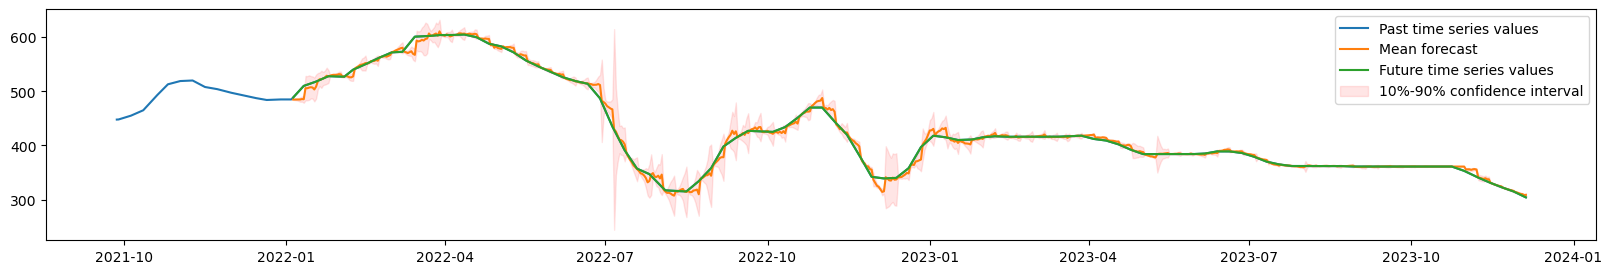

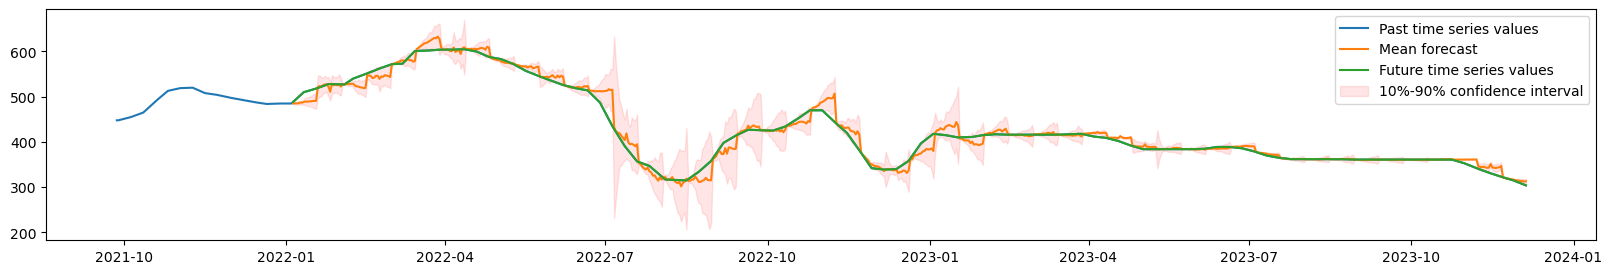

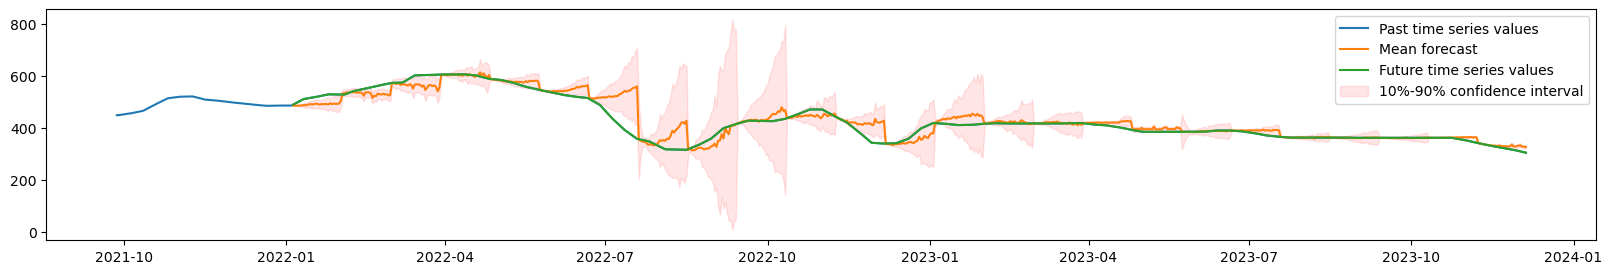

In [19]:
import matplotlib.pyplot as plt

for i in range(3):
    plt.figure(figsize=(20, 3))

    item_id = "선반C"
    y_past = train_data[-800:].loc[item_id]["target"]
    y_pred = prediction_list[i].loc[item_id]
    y_test = test_list[i].loc[item_id]["target"]

    plt.plot(y_past, label="Past time series values")
    plt.plot(y_pred["mean"], label="Mean forecast")
    plt.plot(y_test, label="Future time series values")

    plt.fill_between(
        y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
    )
    plt.legend()

In [20]:
leaderboards_list = []

In [21]:
for j in range(3):
    load_model = TimeSeriesPredictor.load(f'./TSC_{pred_num[j]}/my_model_0/')
    leaderboards = load_model.leaderboard(train_set_list[j][0], silent=True)

    for i in range(1, pred_set[j]):
        predictor = TimeSeriesPredictor.load(f'./TSC_{pred_num[j]}/my_model_{i}/')

        leaderboards_ = predictor.leaderboard(train_set_list[j][i], silent=True)
        leaderboards = pd.concat([leaderboards, leaderboards_])

    leaderboards_list.append(leaderboards)

Loading predictor from path ./TSC_7/my_model_0/
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Loading predictor from path ./TSC_7/my_model_1/
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Loading predictor from path ./TSC_7/my_model_2/
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Loading predictor from path ./TSC_7/my_model_3/
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Loading predictor from path ./TSC_7/my_model_4/
Additional data provided, testing on additional data. Resulting leaderboard will be sorted according to test score (`score_test`).
Loading predictor from path ./TSC_7/my_model_5/
Additional data provided, testing on additional data. Res

In [22]:
for i in range(3):
    print(f"RMSE 값은 : {leaderboards_list[i]['score_test'].mean() * -1} 입니다.")

RMSE 값은 : 3.485992954716236 입니다.
RMSE 값은 : 7.1662239715079314 입니다.
RMSE 값은 : 20.044269411198922 입니다.


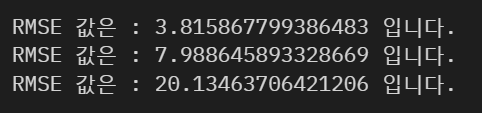

In [23]:
prediction_weekly_list = []

In [24]:
for i in range(3):

    # 'item_id' 인덱스를 일반 열로 변경
    prediction_list[i] = prediction_list[i].reset_index(level='item_id')

    # 주 단위(시작을 월요일로) 리샘플링
    prediction_weekly = prediction_list[i].drop(columns='item_id').resample('W-MON').mean()
    prediction_weekly_list.append(prediction_weekly)

In [25]:
test_weekly_list = []

In [26]:
for i in range(3):

    # 'item_id' 인덱스를 일반 열로 변경
    test_list[i] = test_list[i].reset_index(level='item_id')

    # 주 단위(시작을 월요일로) 리샘플링
    test_weekly = test_list[i].drop(columns='item_id').resample('W-MON').mean()
    test_weekly_list.append(test_weekly)

In [27]:
# 총 101주
# 7일을 예측한 모델만 사용(가장 정확)

In [28]:
# 가격상승은 1 변동없음 또는 하락은 0으로 표기

for j in range(3):

    price_fluctuations = ['-']

    for i in range(1, len(prediction_weekly_list[j])):
        if (prediction_weekly_list[j]["mean"][i] - prediction_weekly_list[j]["mean"][i-1]) > 0:
            price_fluctuations.append(1)
        
        elif (prediction_weekly_list[j]["mean"][i] - prediction_weekly_list[j]["mean"][i-1]) == 0:
            price_fluctuations.append(0)

        else:
            price_fluctuations.append(0)

    prediction_weekly_list[j]["price_fluctuations"] = price_fluctuations

C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_20052\390159449.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (prediction_weekly_list[j]["mean"][i] - prediction_weekly_list[j]["mean"][i-1]) > 0:
C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_20052\390159449.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (prediction_weekly_list[j]["mean"][i] - prediction_weekly_list[j]["mean"][i-1]) == 0:
C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_20052\390159449.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (cons

In [29]:
# 가격상승은 1 변동없음 또는 하락은 0으로 표기

for j in range(3):

    price_fluctuations = ["-"]

    for i in range(1, len(prediction_weekly_list[j])):
        if (test_weekly_list[j]["target"][i] - test_weekly_list[j]["target"][i-1]) > 0:
            price_fluctuations.append(1)

        elif (test_weekly_list[j]["target"][i] - test_weekly_list[j]["target"][i-1]) == 0:
            price_fluctuations.append(0)

        else:
            price_fluctuations.append(0)

    test_weekly_list[j]["price_fluctuations"] = price_fluctuations

C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_20052\408366092.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if (test_weekly_list[j]["target"][i] - test_weekly_list[j]["target"][i-1]) > 0:
C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_20052\408366092.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif (test_weekly_list[j]["target"][i] - test_weekly_list[j]["target"][i-1]) == 0:
C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_20052\408366092.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with Data

In [30]:
for j in range(3):

    Accuracy = []

    for i in range(1, 101):
        if prediction_weekly_list[j]["price_fluctuations"][i] == test_weekly_list[j]["price_fluctuations"][i]:
            Accuracy.append(1)

        else:
            Accuracy.append(0)

    # 리스트 요소들의 총합 구하기
    total = sum(Accuracy)

    total

    print(f"정확도는 {total}% 입니다.")

정확도는 82% 입니다.
정확도는 72% 입니다.
정확도는 57% 입니다.


C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_20052\2423503845.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if prediction_weekly_list[j]["price_fluctuations"][i] == test_weekly_list[j]["price_fluctuations"][i]:


In [31]:
# 7일 앞의 가격만 예상한 것을 쓴다.

In [32]:
prediction_list[0]

,item_id,mean,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
timestamp,,,,,,,,,,,
2022-01-05,선반C,484.834900,484.117767,484.430145,484.599030,484.724518,484.834900,484.945312,485.070770,485.239655,485.552063
2022-01-06,선반C,484.800537,483.687347,484.171173,484.433502,484.628693,484.800537,484.972382,485.167572,485.429901,485.913727
2022-01-07,선반C,484.941833,483.110260,483.902557,484.334808,484.657440,484.941833,485.226227,485.548828,485.981079,486.773407
2022-01-08,선반C,484.602692,482.168915,483.219543,483.794281,484.223816,484.602692,484.981567,485.411133,485.985840,487.036469
2022-01-09,선반C,484.891724,480.717346,482.496490,483.485962,484.231598,484.891724,485.551819,486.297455,487.286926,489.066071
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-01,선반C,311.909393,311.068481,311.435547,311.633453,311.780273,311.909393,312.038483,312.185333,312.383209,312.750275
2023-12-02,선반C,310.578064,309.079773,309.733093,310.085815,310.347717,310.578064,310.808380,311.070282,311.423004,312.076294
2023-12-03,선반C,310.070068,308.134735,308.976746,309.432678,309.771698,310.070068,310.368469,310.707489,311.163422,312.005432


In [33]:
prediction_list[0] = prediction_list[0].reset_index()

In [34]:
prediction_list[0]

,timestamp,item_id,mean,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,2022-01-05,선반C,484.834900,484.117767,484.430145,484.599030,484.724518,484.834900,484.945312,485.070770,485.239655,485.552063
1,2022-01-06,선반C,484.800537,483.687347,484.171173,484.433502,484.628693,484.800537,484.972382,485.167572,485.429901,485.913727
2,2022-01-07,선반C,484.941833,483.110260,483.902557,484.334808,484.657440,484.941833,485.226227,485.548828,485.981079,486.773407
3,2022-01-08,선반C,484.602692,482.168915,483.219543,483.794281,484.223816,484.602692,484.981567,485.411133,485.985840,487.036469
4,2022-01-09,선반C,484.891724,480.717346,482.496490,483.485962,484.231598,484.891724,485.551819,486.297455,487.286926,489.066071
...,...,...,...,...,...,...,...,...,...,...,...,...
695,2023-12-01,선반C,311.909393,311.068481,311.435547,311.633453,311.780273,311.909393,312.038483,312.185333,312.383209,312.750275
696,2023-12-02,선반C,310.578064,309.079773,309.733093,310.085815,310.347717,310.578064,310.808380,311.070282,311.423004,312.076294
697,2023-12-03,선반C,310.070068,308.134735,308.976746,309.432678,309.771698,310.070068,310.368469,310.707489,311.163422,312.005432
698,2023-12-04,선반C,308.347595,307.151062,307.673767,307.955292,308.164062,308.347595,308.531128,308.739899,309.021423,309.544128


In [35]:
preds = prediction_list[0]
preds

,timestamp,item_id,mean,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,2022-01-05,선반C,484.834900,484.117767,484.430145,484.599030,484.724518,484.834900,484.945312,485.070770,485.239655,485.552063
1,2022-01-06,선반C,484.800537,483.687347,484.171173,484.433502,484.628693,484.800537,484.972382,485.167572,485.429901,485.913727
2,2022-01-07,선반C,484.941833,483.110260,483.902557,484.334808,484.657440,484.941833,485.226227,485.548828,485.981079,486.773407
3,2022-01-08,선반C,484.602692,482.168915,483.219543,483.794281,484.223816,484.602692,484.981567,485.411133,485.985840,487.036469
4,2022-01-09,선반C,484.891724,480.717346,482.496490,483.485962,484.231598,484.891724,485.551819,486.297455,487.286926,489.066071
...,...,...,...,...,...,...,...,...,...,...,...,...
695,2023-12-01,선반C,311.909393,311.068481,311.435547,311.633453,311.780273,311.909393,312.038483,312.185333,312.383209,312.750275
696,2023-12-02,선반C,310.578064,309.079773,309.733093,310.085815,310.347717,310.578064,310.808380,311.070282,311.423004,312.076294
697,2023-12-03,선반C,310.070068,308.134735,308.976746,309.432678,309.771698,310.070068,310.368469,310.707489,311.163422,312.005432
698,2023-12-04,선반C,308.347595,307.151062,307.673767,307.955292,308.164062,308.347595,308.531128,308.739899,309.021423,309.544128


In [36]:
# 가격상승은 또는 변동없음은 1 하락은 0으로 표기

price_fluctuations = ["-"]
cost = [0]

for i in range(1, len(preds)):
    if (preds["mean"][i] - preds["mean"][i-1]) > 0:
        price_fluctuations.append("상승")
    
    elif (preds["mean"][i] - preds["mean"][i-1]) == 0:
        price_fluctuations.append("상승")

    else:
        price_fluctuations.append("하락")

    cost.append(preds["mean"][i] - preds["mean"][i-1])

preds["price_fluctuations"] = price_fluctuations
preds["cost"] = cost

preds

,timestamp,item_id,mean,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,price_fluctuations,cost
0,2022-01-05,선반C,484.834900,484.117767,484.430145,484.599030,484.724518,484.834900,484.945312,485.070770,485.239655,485.552063,-,0.000000
1,2022-01-06,선반C,484.800537,483.687347,484.171173,484.433502,484.628693,484.800537,484.972382,485.167572,485.429901,485.913727,하락,-0.034363
2,2022-01-07,선반C,484.941833,483.110260,483.902557,484.334808,484.657440,484.941833,485.226227,485.548828,485.981079,486.773407,상승,0.141296
3,2022-01-08,선반C,484.602692,482.168915,483.219543,483.794281,484.223816,484.602692,484.981567,485.411133,485.985840,487.036469,하락,-0.339142
4,2022-01-09,선반C,484.891724,480.717346,482.496490,483.485962,484.231598,484.891724,485.551819,486.297455,487.286926,489.066071,상승,0.289032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2023-12-01,선반C,311.909393,311.068481,311.435547,311.633453,311.780273,311.909393,312.038483,312.185333,312.383209,312.750275,하락,-1.177979
696,2023-12-02,선반C,310.578064,309.079773,309.733093,310.085815,310.347717,310.578064,310.808380,311.070282,311.423004,312.076294,하락,-1.331329
697,2023-12-03,선반C,310.070068,308.134735,308.976746,309.432678,309.771698,310.070068,310.368469,310.707489,311.163422,312.005432,하락,-0.507996
698,2023-12-04,선반C,308.347595,307.151062,307.673767,307.955292,308.164062,308.347595,308.531128,308.739899,309.021423,309.544128,하락,-1.722473


In [37]:
preds = preds[["item_id", "mean", "timestamp", "cost"]]
preds

,item_id,mean,timestamp,cost
0,선반C,484.834900,2022-01-05,0.000000
1,선반C,484.800537,2022-01-06,-0.034363
2,선반C,484.941833,2022-01-07,0.141296
3,선반C,484.602692,2022-01-08,-0.339142
4,선반C,484.891724,2022-01-09,0.289032
...,...,...,...,...
695,선반C,311.909393,2023-12-01,-1.177979
696,선반C,310.578064,2023-12-02,-1.331329
697,선반C,310.070068,2023-12-03,-0.507996
698,선반C,308.347595,2023-12-04,-1.722473


## 내일은 저장해서 적용까지 하기

In [38]:
# 열 이름 변경
preds.columns = ['type', 'up_down', 'date', 'cost']
preds['date'] = preds['date'].astype(str)
preds['cost'] = preds['cost'].round(3)

# 데이터프레임을 JSON 형식으로 변환
json_data = preds.to_json(orient='records')

# JSON 데이터를 JavaScript 변수에 할당
js_data = f'export const pred_data_tsc = {json_data};'

# .js 파일로 저장
with open('./pred_data_tsc.js', 'w') as file:
    file.write(js_data)

C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_20052\150669175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['date'] = preds['date'].astype(str)
C:\Users\KDP-26-\AppData\Local\Temp\ipykernel_20052\150669175.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preds['cost'] = preds['cost'].round(3)
